In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
#from sklearn.inspection import DecisionBoundaryDisplay

In [25]:
# import some data to play with
iris = datasets.load_iris()

# Choose the first two dimensions as features - just for illustration
X = iris.data[:, :2]
Y = iris.target

# Task 1: Implement a (1-)Nearest Neighbor Classifier

In [26]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances


class NNClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, X_train, y_train):
        """
        Initialize NN-Classifier with dataset
        """
        
        self.X_train = X_train
        self.y_train = y_train
        self._check_inputs()

    def fit(self, X_train, y_train): 
        """
        Can be ignored
        """
        
        return self
    
    def predict(self, X):
        """
        Predict class label of each data point (row) in the 2d-matrix X
        """
        
        predictions = []
        
        for i in range(len(X)):
            predictions.append(self._classify(X[i]))
        
        return np.array(predictions)
    
    def _classify(self, query_point):
        """
        Predict class label of a single data point (``query_point``) based on its neighbor
        as given in ``self.X_train`` and ``self.y_train``
        """

        N = len(self.X_train)
        U = np.zeros(N)

        # TODO
        for i,x in enumerate(self.X_train): # -> i = 0, x = [(5,2), (5,3)]
            U[i] = self._distance(query_point, x)
            
        return self.y_train[np.argmin(U)]
    
    def _check_inputs(self):
        assert self.X_train is not None, "inputs missing"
        assert self.y_train is not None, "outputs missing"
        assert len(self.X_train) == len(self.y_train), "#inputs and #output inconsistent"

    def _getClassAtIndex(self, y, index):
        return y[index]

    def _distance(self, u, v):
        return np.linalg.norm(u-v)
    
    def __sklearn_is_fitted__(self):
        return True
        

# Task 2: Implement a kNN-Classifier

In [27]:
from numpy import argmax
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances


class kNNClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, X_train, Y_train, k):
        """
        Initialize kNN-Classifier with dataset and the number of neighbours ``k``
        """
        
        self.X_train = X_train
        self.y_train = Y_train
        self.X_test = np.concatenate((X_train[:10], X_train[60:70], X_train[140:150]))
        self.Y_test = np.concatenate((Y_train[:10], Y_train[60:70], Y_train[140:150]))
        self.k = k
        self._check_inputs()
        colors = ["tan", "palegreen", "wheat"]
        for i,classs in enumerate(self.y_train):
            plt.scatter(self.X_train[i,0], self.X_train[i, 1], color=colors[classs])

        #plt.scatter(self.X_test[:, 0], self.X_test[:, 1], c="red")

    def fit(self, X_train, y_train): 
        """
        Can be ignored
        """
        
        return self
    
    def predict(self, X):
        """
        Predict class label of each data point (row) in the 2d-matrix X
        """
        
        # TODO
        
        predictions = []
        
        for x in self.X_test: # 30
            predictions.append(self._classify(x, self.k))

        return np.array(predictions)
    
    def _classify(self, query_point, k):
        """
        Predict class label of a single data point (``query_point``) based on its ``k`` nearest neighbours
        as given in ``self.X_train`` and ``self.y_train``
        """
        
        # TODO
        
        N = len(self.X_train) # 150
        U = np.zeros((N,2)) # (150,2)
         
        for i,x in enumerate(self.X_train):
            U[i] = (self._distance(query_point, x),self.y_train[i])
            
        U = sorted(U, key=lambda x: x[0])
        U = np.array(U)[:self.k, 1]
        
        a = np.unique(U, return_counts=True)
        result = a[0][argmax(a[1])]
        plt.scatter(query_point[0],query_point[1],c="red")
        plt.annotate(str(int(result)), (query_point[0],query_point[1]))
        return result
    
    def _check_inputs(self):
        assert self.X_train is not None, "inputs missing"
        assert self.y_train is not None, "outputs missing"
        assert len(self.X_train) == len(self.y_train), "#inputs and #output inconsistent"

    def _getClassAtIndex(self, y, index):
        return y[index]

    def _distance(self, u, v):
        return np.linalg.norm(u-v)
    
    def __sklearn_is_fitted__(self):
        return True
        

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 1.,
       1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1.])

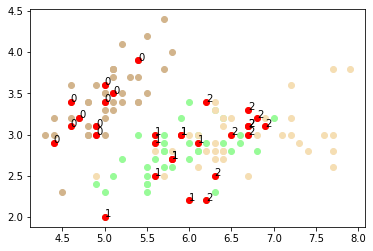

In [28]:
k = 15
#clf = NNClassifier(X, Y)
clf = kNNClassifier(X, Y, k=k)
y_hat = clf.predict(X)
y_hat

# Plot decision boundary of classifier

In [29]:
"""
# See https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
# for visualization code

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# Plot decision boundary
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title("3-Class classification (k = %i)" % (k))
"""

'\n# See https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py\n# for visualization code\n\n# Create color maps\ncmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])\ncmap_bold = ["darkorange", "c", "darkblue"]\n\n# Plot decision boundary\n_, ax = plt.subplots()\nDecisionBoundaryDisplay.from_estimator(\n    clf,\n    X,\n    cmap=cmap_light,\n    ax=ax,\n    response_method="predict",\n    plot_method="pcolormesh",\n    xlabel=iris.feature_names[0],\n    ylabel=iris.feature_names[1],\n    shading="auto",\n)\n\n# Plot also the training points\nsns.scatterplot(\n    x=X[:, 0],\n    y=X[:, 1],\n    hue=iris.target_names[y],\n    palette=cmap_bold,\n    alpha=1.0,\n    edgecolor="black",\n)\nplt.title("3-Class classification (k = %i)" % (k))\n'